# Modelo procesador de imágenes

In [ ]:
# Importar librerías

import os
import shutil
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargar datos y organizar datos

origen = '../data/raw/train'
destino_base = '../data/processed'

for conjunto in ['train', 'test']:
    for clase in ['cat', 'dog']:
        ruta = os.path.join(destino_base, conjunto, clase)
        os.makedirs(ruta, exist_ok=True)

lista_fotografias = os.listdir(origen)

for fotografia in lista_fotografias:
    if not fotografia.lower().endswith('.jpg'):
        continue

    ruta_origen = os.path.join(origen, fotografia)

    if 'cat' in fotografia.lower():
        clase = 'cat'
    elif 'dog' in fotografia.lower():
        clase = 'dog'
    else:
        print(f'Animal desconocido: {fotografia}')
        continue

    conjunto = 'test' if random.random() < 0.2 else 'train'
    ruta_destino = os.path.join(destino_base, conjunto, clase)

    shutil.move(ruta_origen, os.path.join(ruta_destino, fotografia))




In [ ]:
# Ajustar tamaño de imágenes

def resize_images(directory, size=(200, 200)):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)
            save_img(img_path, img_array)

resize_images('../data/processed/train/cat')
resize_images('../data/processed/train/dog')

2025-11-08 02:38:10.324979: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-08 02:38:27.443506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-08 02:38:45.750200: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


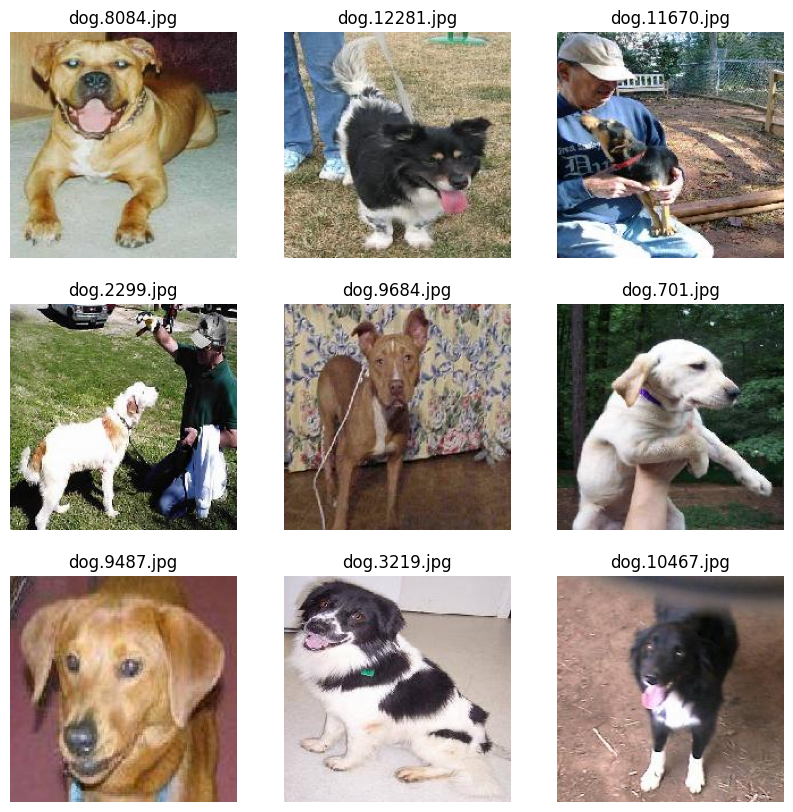

In [ ]:
# Ejemplo imágenes 'dog'

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/dog'))
    img = load_img(os.path.join('../data/processed/train/dog', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')

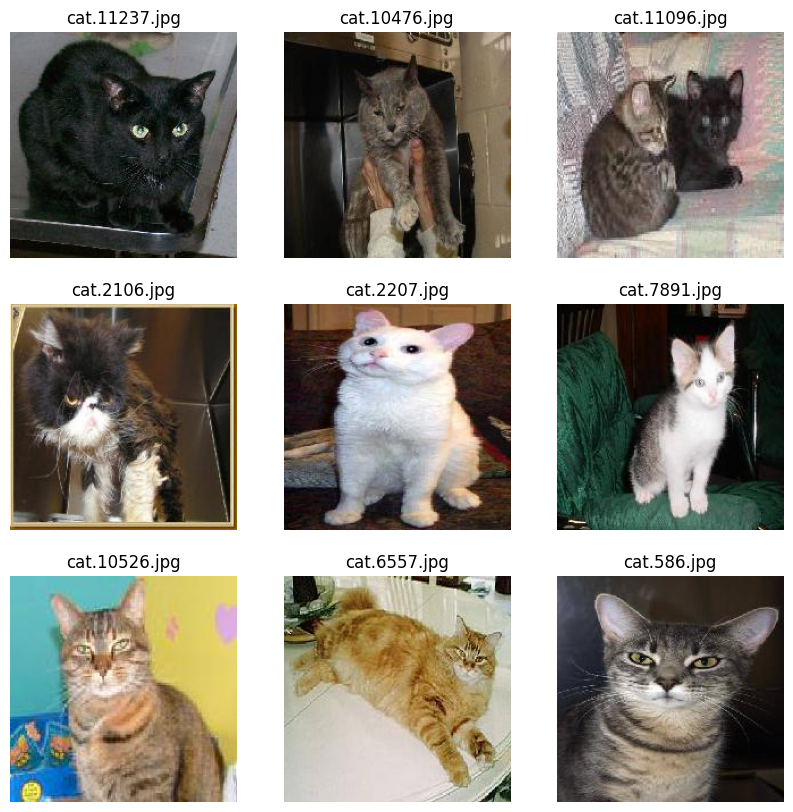

In [6]:
# Ejemplo imágenes 'cat'

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/cat'))
    img = load_img(os.path.join('../data/processed/train/cat', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')

In [7]:
# mover los archivos de la carpeta test desde las subcarpetas dog y cat

for subdir in ['cat', 'dog']:
    subdir_path = os.path.join('../data/processed/test', subdir)
    for filename in os.listdir(subdir_path):
        if filename.endswith('.jpg'):
            src_path = os.path.join(subdir_path, filename)
            dest_path = os.path.join('../data/processed/test', filename)
            shutil.move(src_path, dest_path)

In [ ]:
# Configuración preprocesamiento de imágenes

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/processed/train'
test_dir = '../data/processed/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              classes=['cat', 'dog']
)
test_data = datagentest.flow_from_directory(test_dir,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test']
)

Found 19961 images belonging to 2 classes.
Found 5039 images belonging to 1 classes.


In [ ]:
# Construcción de modelo

model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-08 02:48:28.323453: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-11-08 02:48:28.451225: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 40960000 exceeds 10% of free system memory.
2025-11-08 02:48:28.503604: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 40960000 exceeds 10% of free system memory.
2025-11-08 02:48:28.526607: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 40960000 exceeds 10% of free system memory.


In [16]:
# Compilación

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])
        


In [17]:
# Entremaniento

model.fit(train_data,
          epochs=1)

2025-11-08 02:55:19.904620: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 40960000 exceeds 10% of free system memory.
2025-11-08 02:55:21.848361: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 163840000 exceeds 10% of free system memory.


624/624 ━━━━━━━━━━━━━━━━━━━━ 1218s 2s/step - accuracy: 0.6702 - loss: 0.5954


In [ ]:
# Función para predicciones


def predict_image(model, img_path):
    img = load_img(img_path, target_size=(200, 200))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    return predictions

In [ ]:
# Ejemplo de predicciones

img_path = random.choice(os.listdir('../data/processed/test'))
predictions = predict_image(model, os.path.join('../data/processed/test', img_path))
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class for {img_path}: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class for cat.7806.jpg: [0]


In [20]:
# Guardar modelo

model.save('../models/cat_dog_classifier.h5')

CONCLUSIONES:

- Durante el desarrollo del proyecto, se evidencia que el éxito de un modelo de clasificación de imágenes depende en gran medida del preprocesamiento. Normalizar tamaños, y asegurar la calidad de los datos es clave para evitar errores y mejorar la precisión.
- El diseño del modelo: la elección de capas, funciones de activación y parámetros como el tamaño de imagen o el batch size deben ajustarse al tipo de datos y al objetivo del proyecto.
- Debido a la limitada capacidad de cómputo no fue posible experimentar con diferentes configuraciones para observar cómo pequeñas modificaciones pueden impactar significativamente el rendimiento del modelo.
